# Introduction

# Exploratory Data Analysis

Importing necessary libraries.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

Importing the dataset and describing the features.

In [2]:
diamonds=pd.read_csv('diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Feild Description:
- Carat: weight of the diamond.
- Cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal).
- Color: diamond colour, from J (worst) to D (best).
- Clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
- Depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
- Table: width of top of diamond relative to widest point.
- Price: price in US dollars.
- X: length in mm.
- Y: width in mm.
- Z: depth in mm.

### Data cleaning and EDA

In [3]:
diamonds.shape

(53940, 10)

There 10 features and 53940 observations.

In [4]:
print('Summary statistics of numerical columns')
diamonds.describe()

Summary statistics of numerical columns


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Checking the data types.

In [5]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Printing the sum of null values in each column.

In [6]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Data has no null values.

Checking for duplicated rows.

In [7]:
print('There are {} duplicated rows.'.format(diamonds.duplicated().sum()))

There are 146 duplicated rows.


Dropping duplicated rows.

In [8]:
diamonds.drop_duplicates(inplace=True)
print('There are {} duplicated rows.'.format(diamonds.duplicated().sum()))

There are 0 duplicated rows.


Detecting and removing outliers.

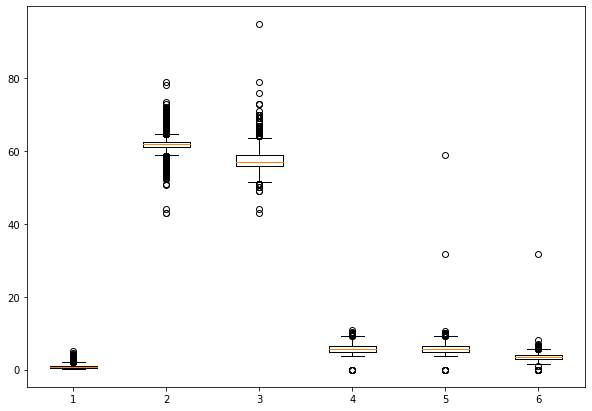

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(diamonds[['carat','depth','table','x','y','z']])
plt.show()

We can treat values for table above 80 as outliers. Also, values for y and z above 15 as oultiers.

In [10]:
diamonds.drop(diamonds[diamonds['table'] >80].index, inplace = True)
diamonds.drop(diamonds[diamonds['y'] >15].index, inplace = True)
diamonds.drop(diamonds[diamonds['z'] >15].index, inplace = True)

I will visualize the price column separately as it has different range from the carat, depth, table, x, y, z.

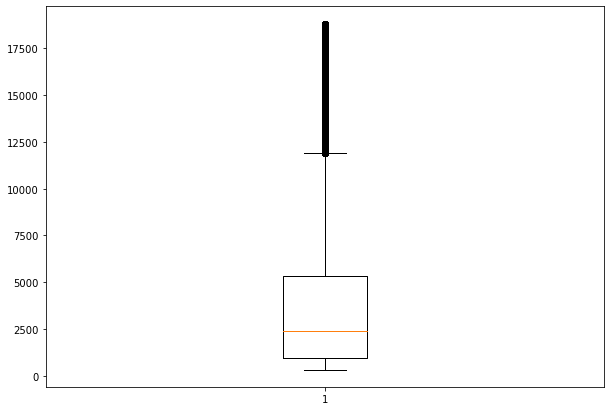

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(diamonds[['price']])
plt.show()

Observing the plot shows that there are no outliers for price.

Converting the cut column into numerical values to visualize it and use it for modeling,
from best (1 = Ideal) to worst (5 = Fair).

In [12]:
def func(x):
    if x=='Ideal':
        return 1
    if x=='Premium':
        return 2
    if x=='Very Good':
        return 3
    if x=='Good':
        return 4
    else: return 5
diamonds['cut']=diamonds['cut'].apply(lambda x: func(x))

Visualizing the distribtuion of the Cut variable against other numerical variables.

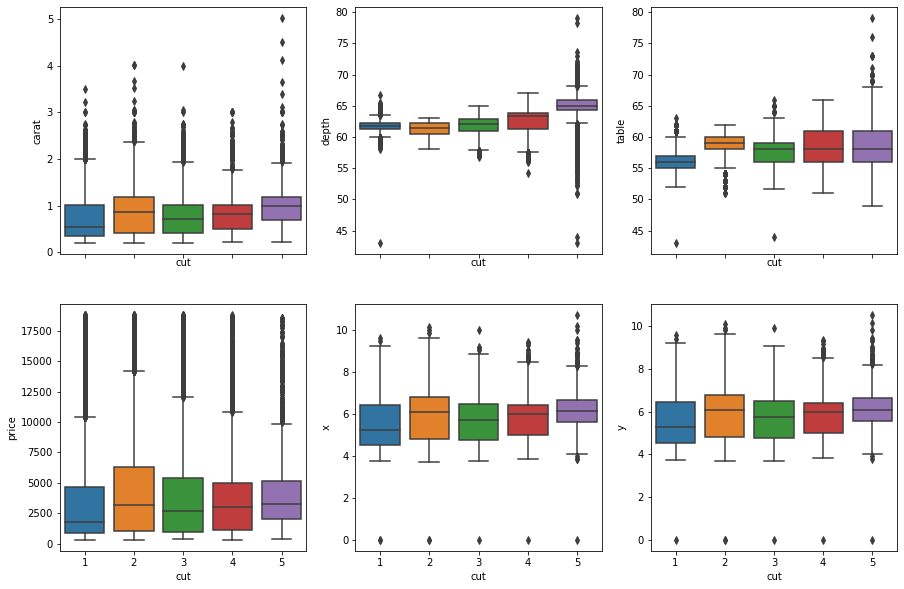

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15,10))

sns.boxplot(ax=axes[0,0],x='cut', y='carat', data=diamonds);
sns.boxplot(ax=axes[0,1],x='cut', y='depth', data=diamonds);
sns.boxplot(ax=axes[0,2],x='cut', y='table', data=diamonds);
sns.boxplot(ax=axes[1,0],x='cut', y='price', data=diamonds);
sns.boxplot(ax=axes[1,1],x='cut', y='x', data=diamonds);
sns.boxplot(ax=axes[1,2],x='cut', y='y', data=diamonds);

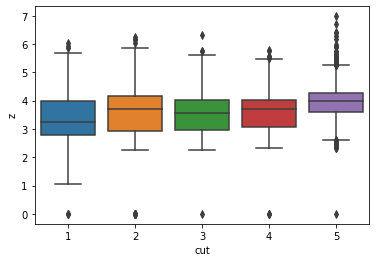

In [14]:
sns.boxplot(x='cut', y='z', data=diamonds);

Pairplot for the data, and Cut variable passed as a hue.

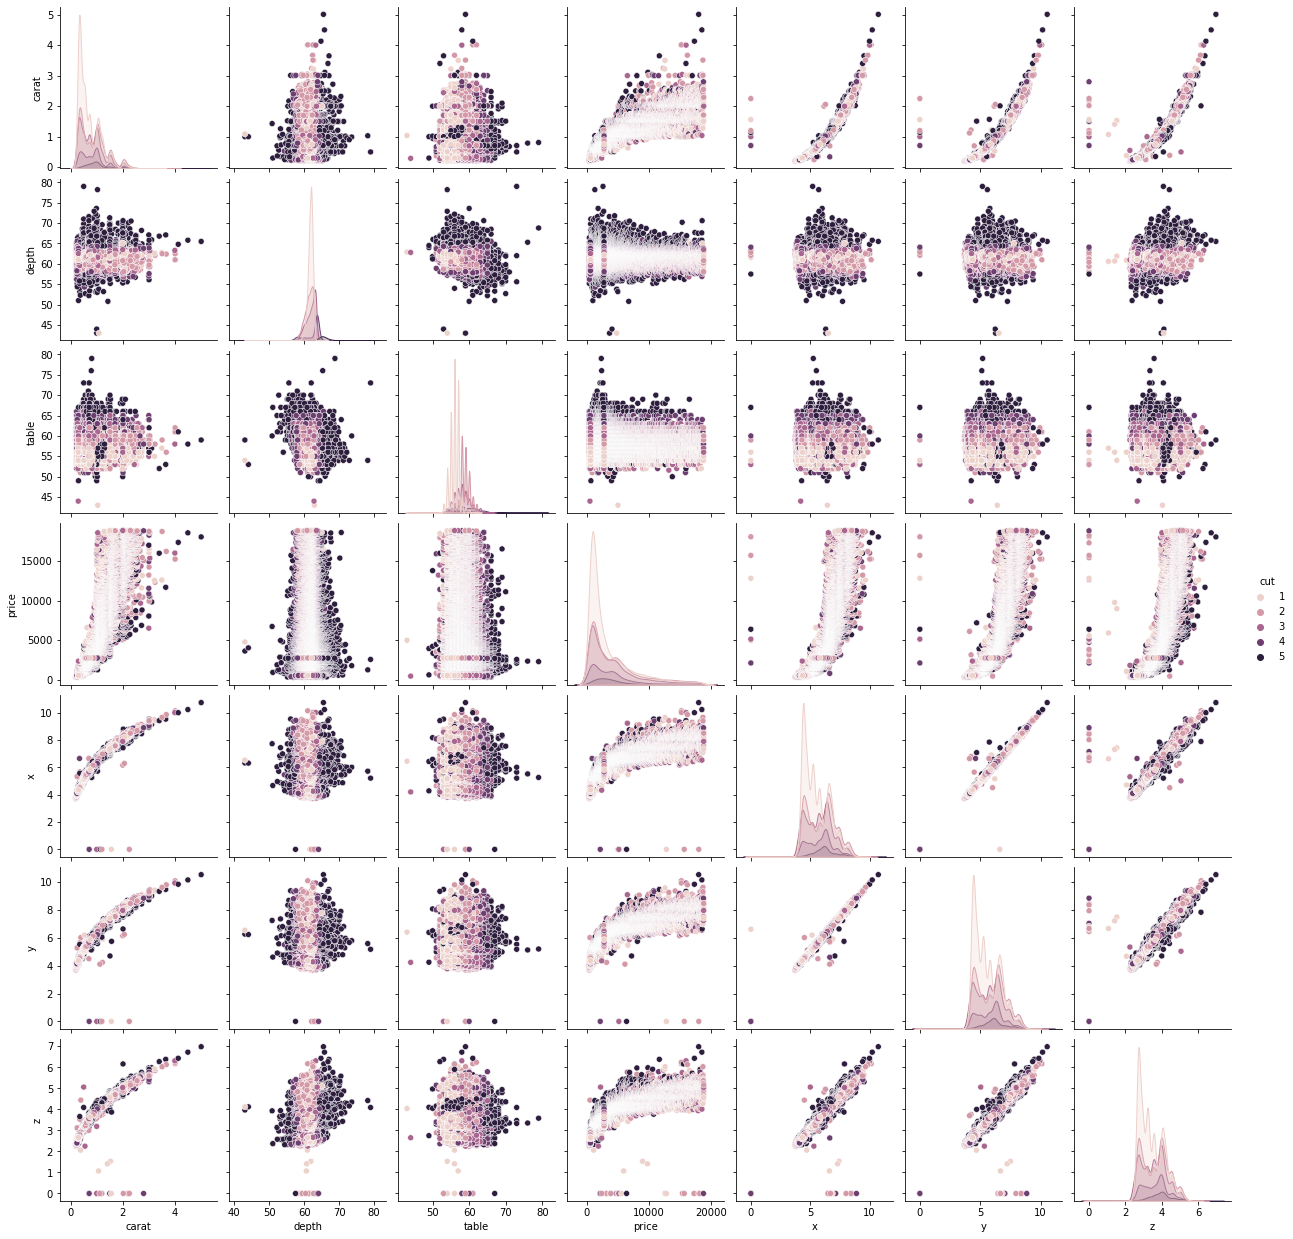

In [15]:
sns.pairplot(diamonds, hue='cut');

We can see that depth and table show better separation of the data than other variables.

Visualizing the count of the Cut variable.

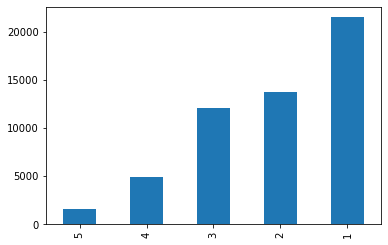

In [16]:
diamonds.cut.value_counts().sort_values().plot(kind = 'bar');

In [17]:
diamonds.cut.value_counts()

1    21487
2    13747
3    12068
4     4891
5     1597
Name: cut, dtype: int64

We can see that there is a huge class imbalance.

Visualizing the relationship between the Cut variable and all other variables.

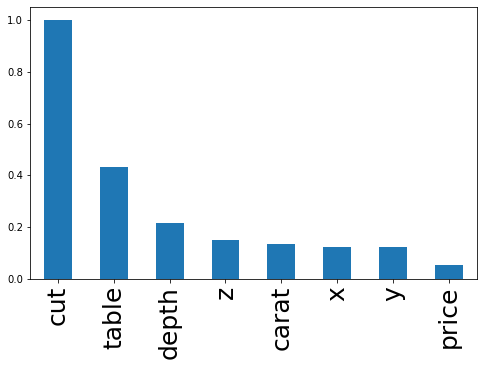

In [18]:
plt.figure(figsize=(8,5))
ax = diamonds.corr()['cut'].sort_values(ascending = False).plot(kind='bar')
plt.xticks(fontsize=25, rotation=90);

We can see that table, depth, z, carat have the strongest relationship with the Cut variable.

### Preparing the data for analysis 

Categorial variables preprocessing

In [19]:
diamonds=pd.get_dummies(diamonds)

Splitting the data into features and target

In [20]:
x=diamonds.drop('cut',axis=1)
y=diamonds['cut']

Creating training, validation and testing sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

Numerical variables preprocessing

In [22]:
scaler=StandardScaler()
X_train[['carat','depth','table','price','x','y','z']]=scaler.fit_transform(X_train[['carat','depth','table','price','x','y','z']])
X_val[['carat','depth','table','price','x','y','z']]=scaler.transform(X_val[['carat','depth','table','price','x','y','z']])
X_test[['carat','depth','table','price','x','y','z']]=scaler.transform(X_test[['carat','depth','table','price','x','y','z']])

### Fixing imbalanced classes

As we saw in EDA section, there is class imbalance. I will try 3 different oversampling techniques and compare their performance using 4 different classifiers. After that, I will choose the technique that gives the best performance to be used for the rest of the anaylsis and modeling.
Please note that f1_score has been chosen as the most relevant evaluation metric in the 'Determining the most relevant classification metric(s)' section.

1. SMOTE technique.

In [25]:
smote=SMOTE()
X_train_sm, y_train_sm=smote.fit_resample(X_train,y_train)

log = LogisticRegression()
log.fit(X_train_sm, y_train_sm)
sgc = SGDClassifier()
sgc.fit(X_train_sm, y_train_sm)
rfc = RandomForestClassifier()
rfc.fit(X_train_sm, y_train_sm)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm, y_train_sm)

print("The average of f1 scores across different classifiers using SMOTE oversampling technique is {}".format(avg([metrics.f1_score(y_val, log.predict(X_val), average = 'micro'),metrics.f1_score(y_val, sgc.predict(X_val), average = 'micro')])))

The average of f1 scores across different classifiers using SMOTE oversampling technique is 0.5884922848113032


2. Random oversampling.

In [26]:
ros = RandomOverSampler(random_state=0)
X_train_r, y_train_r = ros.fit_resample(X_train,y_train)
log = LogisticRegression()
log.fit(X_train_r, y_train_r)
sgc = SGDClassifier()
sgc.fit(X_train_r, y_train_r)
rfc = RandomForestClassifier()
rfc.fit(X_train_r, y_train_r)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_r, y_train_r)

print("The average of f1 scores across different classifiers using random oversampling technique is {}".format(avg([metrics.f1_score(y_val, log.predict(X_val), average = 'micro'),metrics.f1_score(y_val, sgc.predict(X_val), average = 'micro')])))

The average of f1 scores across different classifiers using random oversampling technique is 0.5525190555865402


3. ADASYN technique.

In [27]:
X_train_adasyn, y_train_adasyn = ADASYN(random_state=42).fit_resample(X_train,y_train)

log = LogisticRegression()
log.fit(X_train_adasyn, y_train_adasyn)
sgc = SGDClassifier()
sgc.fit(X_train_adasyn, y_train_adasyn)
rfc = RandomForestClassifier()
rfc.fit(X_train_adasyn, y_train_adasyn)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_adasyn, y_train_adasyn)

print("The average of f1 scores across different classifiers using ADASYN oversampling technique is {}".format(avg([metrics.f1_score(y_val, log.predict(X_val), average = 'micro'),metrics.f1_score(y_val, sgc.predict(X_val), average = 'micro')])))

The average of f1 scores across different classifiers using ADASYN oversampling technique is 0.5988101877672429


In [24]:
def avg(numbers):
    return float(sum(numbers))/len(numbers)

Since SMOTE technique achieved the best performance, it will be used for the rest of the modeling.

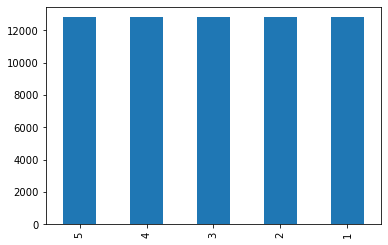

In [28]:
y_train_sm.value_counts().sort_values().plot(kind = 'bar');

### Determining the most relevant classification metric(s)

I will use Logistic regression to draw the confusion matrix and determine the most relevant classification metric.

In [29]:
tree = DecisionTreeClassifier()
tree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

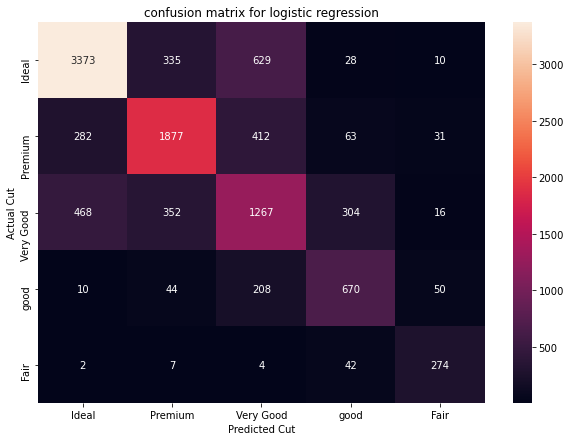

In [30]:
confusion_matrix1=confusion_matrix(y_val, tree.predict(X_val))
plt.figure(figsize = (10,7))
ax = sns.heatmap(confusion_matrix1, annot=True,fmt = ".0f")
ax.set_title('confusion matrix for logistic regression');
ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
plt.xlabel('Predicted Cut');
plt.ylabel('Actual Cut');

F1 score is the most relevant confusion matrix.

# Modeling

### 1. Baseline model: 

**KNeighborsClassifier**

Training the model on a subset of features.

In [31]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_sm[['carat','depth','table','z']], y_train_sm)
f1_score=metrics.f1_score(y_val, neigh.predict(X_val[['carat','depth','table','z']]), average = 'micro')
print("F1_score for KNeighborsClassifier using a subset of features is {}".format(f1_score))

F1_score for KNeighborsClassifier using a subset of features is 0.6648075850529839


Training the model the whole set of features.

In [32]:
neigh.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, neigh.predict(X_val), average = 'micro')
print("F1_score for KNeighborsClassifier using the whole set of features is {}".format(f1_score))

F1_score for KNeighborsClassifier using the whole set of features is 0.6212121212121212


Tuning the hyperparameters for a subset of features.

In [33]:
grid_values = {'leaf_size':[10,20,30,40], 'n_neighbors':[10,15,20,30]}
neigh_grid = GridSearchCV(neigh, param_grid = grid_values,cv=3, scoring = 'f1_micro')
neigh_grid.fit(X_train_sm[['carat','depth','table','z']], y_train_sm)
neigh_grid.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=15)

In [34]:
f1_score=metrics.f1_score(y_val, neigh_grid.predict(X_val[['carat','depth','table','z']]), average = 'micro')
print("F1_score for KNeighborsClassifier using a subset of features after tuning hyperparameters is {}".format(f1_score))

F1_score for KNeighborsClassifier using a subset of features after tuning hyperparameters is 0.6918572225320692


In [35]:
print('Classification report for best KNeighborsClassifier estimator')
print(metrics.classification_report(y_val, neigh_grid.predict(X_val[['carat','depth','table','z']])))

Classification report for best KNeighborsClassifier estimator
              precision    recall  f1-score   support

           1       0.83      0.89      0.86      4375
           2       0.64      0.70      0.67      2665
           3       0.48      0.29      0.36      2407
           4       0.54      0.71      0.61       982
           5       0.77      0.86      0.81       329

    accuracy                           0.69     10758
   macro avg       0.65      0.69      0.66     10758
weighted avg       0.67      0.69      0.68     10758



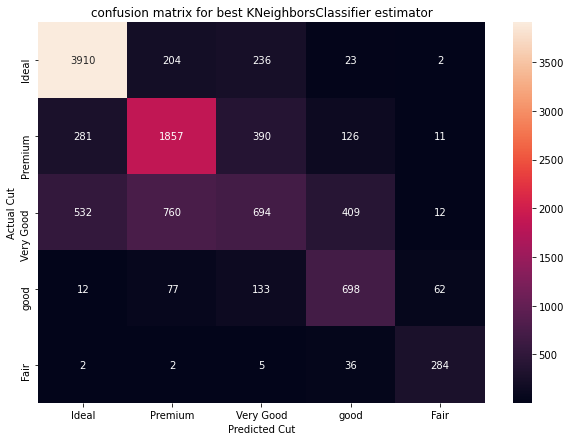

In [36]:
confusion_matrix0=confusion_matrix(y_val, neigh_grid.predict(X_val[['carat','depth','table','z']]))
plt.figure(figsize = (10,7))
ax = sns.heatmap(confusion_matrix0, annot=True,fmt = ".0f")
ax.set_title('confusion matrix for best KNeighborsClassifier estimator');
ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
plt.xlabel('Predicted Cut');
plt.ylabel('Actual Cut');

### 2. Model improvement:
- Logistic regression
- SGD Classifier
- Decision Tree
- Random Forest
- Gradient Boosting

I will try other simple classifiers such as logistic regression and SGD Classifier before complex tree-based classifiers.

**Logistic Regression**

Training the model on a subset of features.

In [37]:
logit = LogisticRegression(multi_class='multinomial')
logit.fit(X_train_sm[['carat','depth','table','z']], y_train_sm)
f1_score=metrics.f1_score(y_val, logit.predict(X_val[['carat','depth','table','z']]), average = 'micro')
print("F1_score for logistic regression using a subset of features is {}".format(f1_score))

F1_score for logistic regression using a subset of features is 0.49618888269195016


Training the model the whole set of features.

In [38]:
logit.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, logit.predict(X_val), average = 'micro')
print("F1_score for logistic regression using the whole set of features is {}".format(f1_score))

F1_score for logistic regression using the whole set of features is 0.6084774121583938


Tuning the hyperparameters for the whole set of features.

In [ ]:
logit = LogisticRegression(multi_class='multinomial')
grid_values = {'penalty': ['l1', 'l2'],'C':[1000,4000,6000,8000,10000,100000], 'solver': ['liblinear', 'saga', 'newton-cg'] }
logit_grid = GridSearchCV(logit, param_grid = grid_values,cv=5, scoring = 'f1_micro')
logit_grid.fit(X_train_sm, y_train_sm)
logit_grid.best_estimator_

In [ ]:
f1_score=metrics.f1_score(y_val, logit_grid.predict(X_val), average = 'micro')
print("F1_score for logistic regression using the whole set of features after tuning hyperparameters is {}".format(f1_score))

In [ ]:
print('Classification report for best logistic regression estimator')
print(metrics.classification_report(y_val, logit_grid.predict(X_val)))

Confusion matrix

In [ ]:
confusion_matrix2=confusion_matrix(y_val, logit_grid.predict(X_val))
plt.figure(figsize = (10,7))
ax = sns.heatmap(confusion_matrix2, annot=True,fmt = ".0f")
ax.set_title('confusion matrix for best logistic regression estimator');
ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
plt.xlabel('Predicted Cut');
plt.ylabel('Actual Cut');

**SGDClassifier**

Training the model on a subset of features.

In [57]:
sgc = SGDClassifier()
sgc.fit(X_train_sm[['carat','depth','table','z']], y_train_sm)
f1_score=metrics.f1_score(y_val, sgc.predict(X_val[['carat','depth','table','z']]), average = 'micro')
print("F1_score for SGD classifier using a subset of features is {}".format(f1_score))

F1_score for SGD classifier using a subset of features is 0.5066926938092582


Training the model the whole set of features.

In [58]:
sgc.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, sgc.predict(X_val), average = 'micro')
print("F1_score for SGD classifier using the whole set of features is {}".format(f1_score))

F1_score for SGD classifier using the whole set of features is 0.5658114891243725


Tuning the hyperparameters for the whole set of features.

In [59]:
sgd = SGDClassifier()
grid = {'alpha': [1e-4, 1e-2, 1e-1, 1e0, 1e2, 1e3],'max_iter': [100,500,1000], 'loss': ['log'],'penalty': ['l2']}
sgd_cv=GridSearchCV(sgd,param_grid = grid,cv=3, scoring = 'f1_micro')
sgd_cv.fit(X_train_sm, y_train_sm)
sgd_cv.best_estimator_

SGDClassifier(loss='log')

In [60]:
f1_score=metrics.f1_score(y_val, sgd_cv.predict(X_val), average = 'micro')
print("F1_score for SGD classifier using the whole set of features after tuning hyperparameters is {}".format(f1_score))

F1_score for SGD classifier using the whole set of features after tuning hyperparameters is 0.5797546012269938


In [61]:
print('Classification report for best SGD classifier')
print(metrics.classification_report(y_val, sgd_cv.predict(X_val)))

Classification report for best SGD classifier
              precision    recall  f1-score   support

           1       0.75      0.80      0.77      4375
           2       0.68      0.57      0.62      2665
           3       0.45      0.31      0.37      2407
           4       0.23      0.24      0.24       982
           5       0.21      0.72      0.32       329

    accuracy                           0.58     10758
   macro avg       0.46      0.53      0.46     10758
weighted avg       0.60      0.58      0.58     10758



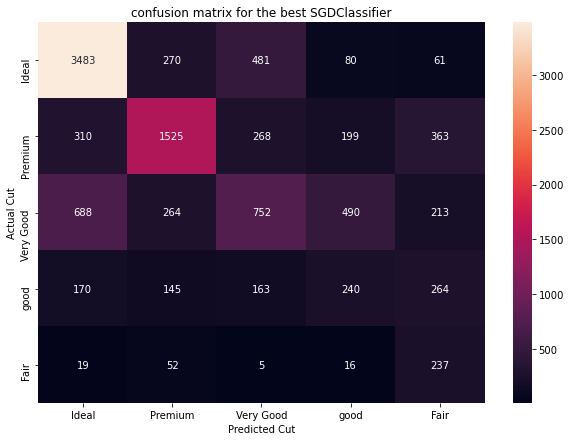

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix3=confusion_matrix(y_val, sgd_cv.predict(X_val))
plt.figure(figsize = (10,7))
ax = sns.heatmap(confusion_matrix3, annot=True,fmt = ".0f")
ax.set_title('confusion matrix for the best SGDClassifier');
ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
plt.xlabel('Predicted Cut');
plt.ylabel('Actual Cut');

**DecisionTreeClassifier**

Training the model on a subset of features.

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm[['carat','depth','table','z']], y_train_sm)
f1_score=metrics.f1_score(y_val, decision_tree.predict(X_val[['carat','depth','table','z']]), average = 'micro')
print("F1_score for Decision tree using a subset of features is {}".format(f1_score))

F1_score for Decision tree using a subset of features is 0.629577988473694


Training the model the whole set of features.

In [29]:
decision_tree.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, decision_tree.predict(X_val), average = 'micro')
print("F1_score for Decision tree using a the whole set of features is {}".format(f1_score))

F1_score for Decision tree using a the whole set of features is 0.6929726715002789


Tuning the hyperparameters for the whole set of features.

In [30]:
decision_tree = DecisionTreeClassifier()
params = {'max_leaf_nodes': list(range(5, 30)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy'],'max_depth':[8,10,20,30,50,70]}
decision_tree_grid = GridSearchCV(decision_tree, param_grid = params,cv=3,scoring = 'f1_micro')
decision_tree_grid.fit(X_train_sm, y_train_sm)
decision_tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=29)

In [31]:
f1_score=metrics.f1_score(y_val, decision_tree_grid.predict(X_val), average = 'micro')
print("F1_score for decision tree classifier using the whole set of features after tuning hyperparameters is {}".format(f1_score))

F1_score for decision tree classifier using the whole set of features after tuning hyperparameters is 0.7277374976761481


In [32]:
print('Classification report for the best decision tree classifier')
print(metrics.classification_report(y_val, decision_tree_grid.predict(X_val)))

Classification report for the best decision tree classifier
              precision    recall  f1-score   support

           1       0.82      0.91      0.86      4375
           2       0.66      0.75      0.71      2665
           3       0.61      0.37      0.46      2407
           4       0.62      0.68      0.65       982
           5       0.83      0.91      0.87       329

    accuracy                           0.73     10758
   macro avg       0.71      0.73      0.71     10758
weighted avg       0.72      0.73      0.71     10758



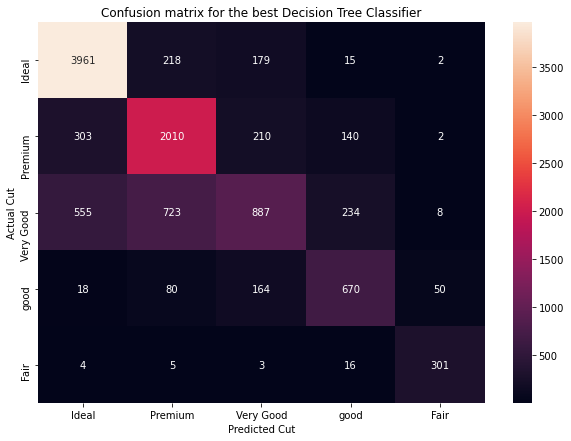

In [33]:
confusion_matrix4=confusion_matrix(y_val, decision_tree_grid.predict(X_val))
plt.figure(figsize = (10,7))
ax = sns.heatmap(confusion_matrix4, annot=True,fmt = ".0f")
ax.set_title('Confusion matrix for the best Decision Tree Classifier');
ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
plt.xlabel('Predicted Cut');
plt.ylabel('Actual Cut');

**RandomForestClassifier**

Training the model on a subset of features.

In [33]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train_sm[['carat','depth','table','z']], y_train_sm)
f1_score=metrics.f1_score(y_val, random_forest.predict(X_val[['carat','depth','table','z']]), average = 'micro')
print("F1_score for Random Forest using a subset of features is {}".format(f1_score))

F1_score for Random Forest using a subset of features is 0.668153931957613


Training the model the whole set of features.

In [34]:
random_forest.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, random_forest.predict(X_val), average = 'micro')
print("F1_score for Random Forest using the whole set of features is {}".format(f1_score))

F1_score for Random Forest using the whole set of features is 0.7495817066369214


Random forest achieved a good f1 score.

In [35]:
print('Classification report for the best Random Forest classifier')
print(metrics.classification_report(y_val, random_forest.predict(X_val)))

Classification report for the best Random Forest classifier
              precision    recall  f1-score   support

           1       0.83      0.90      0.86      4375
           2       0.73      0.77      0.75      2665
           3       0.61      0.45      0.52      2407
           4       0.64      0.75      0.69       982
           5       0.85      0.87      0.86       329

    accuracy                           0.75     10758
   macro avg       0.73      0.75      0.74     10758
weighted avg       0.74      0.75      0.74     10758



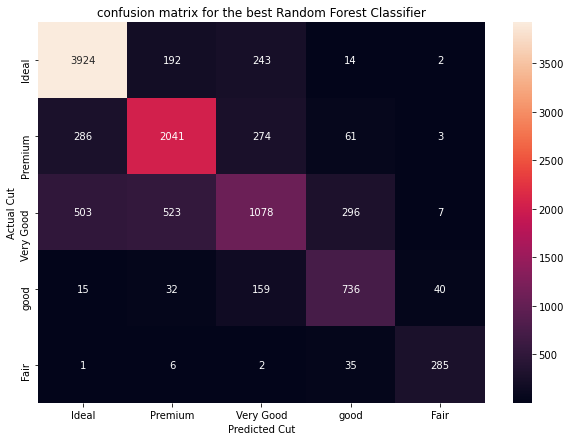

In [37]:
confusion_matrix5=confusion_matrix(y_val, random_forest.predict(X_val))
plt.figure(figsize = (10,7))
ax = sns.heatmap(confusion_matrix5, annot=True,fmt = ".0f")
ax.set_title('confusion matrix for the best Random Forest Classifier');
ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
plt.xlabel('Predicted Cut');
plt.ylabel('Actual Cut');

**GradientBoostingClassifier**

Training the model on a subset of features.

In [38]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sm[['carat','depth','table','z']], y_train_sm)
f1_score=metrics.f1_score(y_val, gbc.predict(X_val[['carat','depth','table','z']]), average = 'micro')
print("F1_score for Gradient Boosting Classifier using a subset of features is {}".format(f1_score))

F1_score for Gradient Boosting Classifier using a subset of features is 0.7282022680795687


Training the model the whole set of features.

In [39]:
gbc.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, gbc.predict(X_val), average = 'micro')
print("F1_score for Gradient Boosting Classifier using the whole set of features is {}".format(f1_score))

F1_score for Gradient Boosting Classifier using the whole set of features is 0.7467930842163971


In [ ]:
print('Classification report for Gradient Boosting Classifier')
print(metrics.classification_report(y_val, gbc_grid.predict(X_val)))

In [ ]:
confusion_matrix6=confusion_matrix(y_val, gbc_grid.predict(X_val))
plt.figure(figsize = (10,7))
ax = sns.heatmap(confusion_matrix6, annot=True,fmt = ".0f")
ax.set_title('confusion matrix for Gradient Boosting Classifier');
ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
plt.xlabel('Predicted Cut');
plt.ylabel('Actual Cut');

## Finalizing, testing, and interpreting the best model



The best model is Random Forest model. I will combine the training and validation sets in a single set to be used for training. I will fit this training set into the random forest model. After that, I will perform cross validation on the whole training set.

In [90]:
X_train_combined=pd.concat([X_train,X_val])
y_train_combined=pd.concat([y_train,y_val])
X_train_sm, y_train_sm=smote.fit_resample(X_train_combined,y_train_combined)

Fitting the data and performing cross validation on the whole training set.

In [30]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train_sm, y_train_sm)
scores=cross_val_score(random_forest, X_train_sm, y_train_sm, cv=3, scoring='f1_micro')
print('Average f1 scores after perfoming cross validation is {}'.format(np.mean(scores)))

Average f1 scores after perfoming cross validation is 0.8500004539076663


In [31]:
f1_score=metrics.f1_score(y_test, random_forest.predict(X_test), average = 'micro')
print("F1_score for Random Forest on the test data is {}".format(f1_score))

F1_score for Random Forest on the test data is 0.697620375534486


In [32]:
print('Classification report for the Random Forest classifier')
print(metrics.classification_report(y_test, random_forest.predict(X_test)))

Classification report for the Random Forest classifier
              precision    recall  f1-score   support

           1       0.84      0.88      0.86      4311
           2       0.79      0.65      0.71      2715
           3       0.66      0.42      0.52      2433
           4       0.71      0.60      0.65       993
           5       0.19      0.97      0.32       306

    accuracy                           0.70     10758
   macro avg       0.64      0.71      0.61     10758
weighted avg       0.76      0.70      0.71     10758



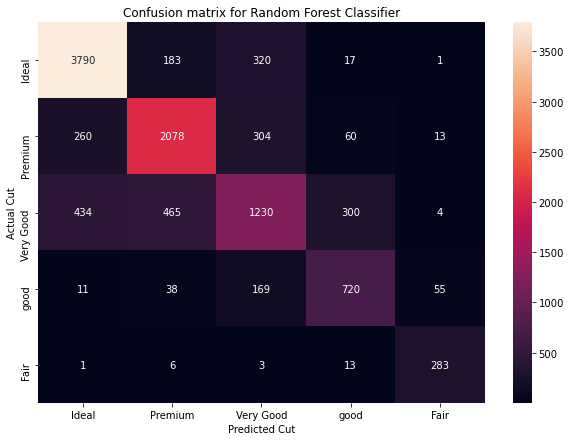

In [48]:
confusion_matrix8=confusion_matrix(y_test, random_forest.predict(X_test))
plt.figure(figsize = (10,7))
ax = sns.heatmap(confusion_matrix8, annot=True,fmt = ".0f")
ax.set_title('Confusion matrix for Random Forest Classifier');
ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','good','Fair']);
plt.xlabel('Predicted Cut');
plt.ylabel('Actual Cut');

Plotting feature importances for the random forest classifier.

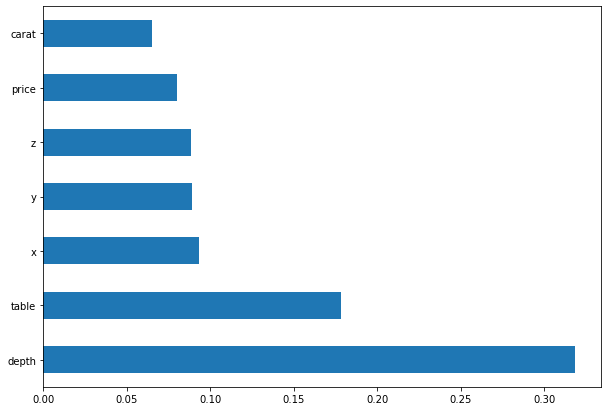

In [49]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(random_forest.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

The table and depth are the most important features as expected during the EDA section. And nearly all reamining features have the same importance except for the carat feature, which was slighlty more important than y, x and the price when exploring the data at the begining.

**Conclusion**

After performing Exploratory analysis, different models have been used in order to predict the cut of the diamond.
The best model is Random Forest mode, it achieved f1 score 0.75 in the test set. 
The most important features are depth and table. After that comes x, y, z and price. And lastly the carat.